https://www.tensorflow.org/tutorials/images/classification?hl=ko

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [3]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path('/Users/dong-ju/.keras/datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


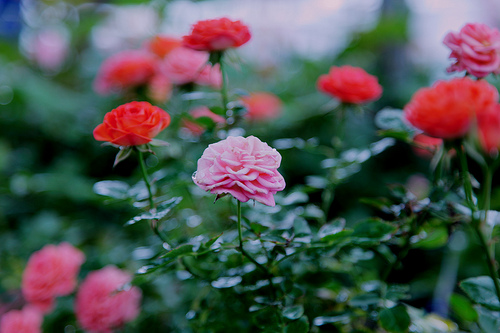

In [16]:
# roses = list(data_dir.glob('roses/*'))
# PIL.Image.open(str(roses[0]))

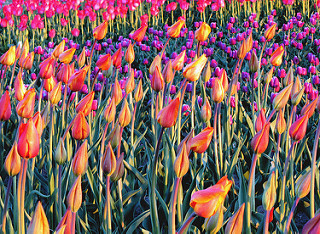

In [17]:
# tulips = list(data_dir.glob('tulips/*'))
# PIL.Image.open(str(tulips[0]))

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


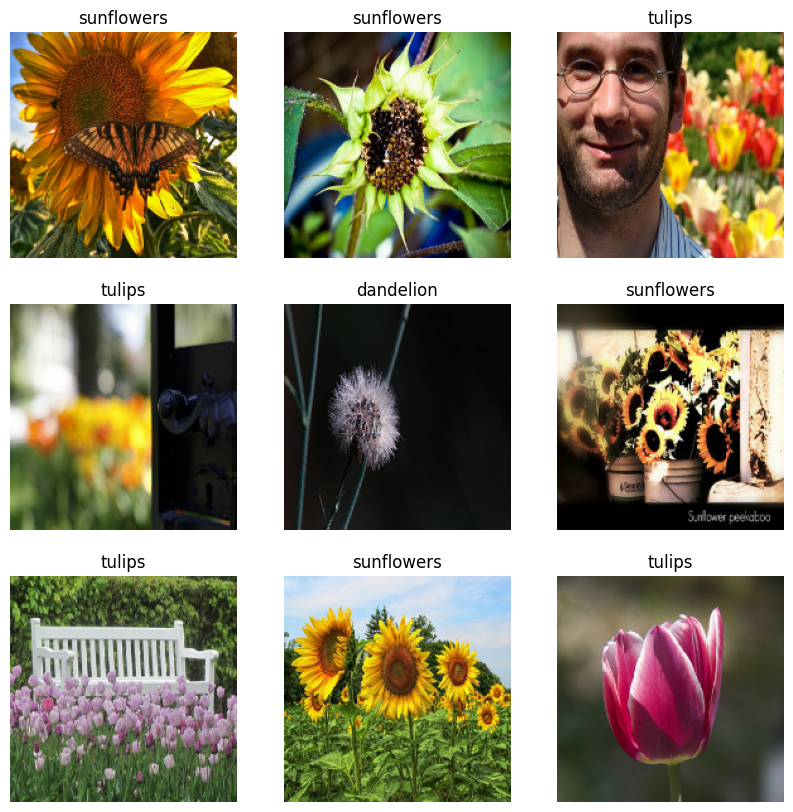

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
normalization_layer = layers.Rescaling(1./255)

In [27]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8950439


In [28]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 13s 133ms/step - loss: 1.3630 - accuracy: 0.3971 - val_loss: 1.0979 - val_accuracy: 0.5381
Epoch 2/10
92/92 [==============================] - 12s 127ms/step - loss: 1.0465 - accuracy: 0.5657 - val_loss: 1.0497 - val_accuracy: 0.5899
Epoch 3/10
92/92 [==============================] - 12s 129ms/step - loss: 0.9060 - accuracy: 0.6437 - val_loss: 0.9060 - val_accuracy: 0.6417
Epoch 4/10
92/92 [==============================] - 12s 131ms/step - loss: 0.7482 - accuracy: 0.7176 - val_loss: 0.9411 - val_accuracy: 0.6322
Epoch 5/10
92/92 [==============================] - 12s 133ms/step - loss: 0.5705 - accuracy: 0.7847 - val_loss: 0.9972 - val_accuracy: 0.6335
Epoch 6/10
92/92 [==============================] - 12s 133ms/step - loss: 0.3997 - accuracy: 0.8539 - val_loss: 1.1229 - val_accuracy: 0.5981
Epoch 7/10
92/92 [==============================] - 12s 135ms/step - loss: 0.3000 - accuracy: 0.8924 - val_loss: 1.1601 - val_accuracy: 0.6335

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

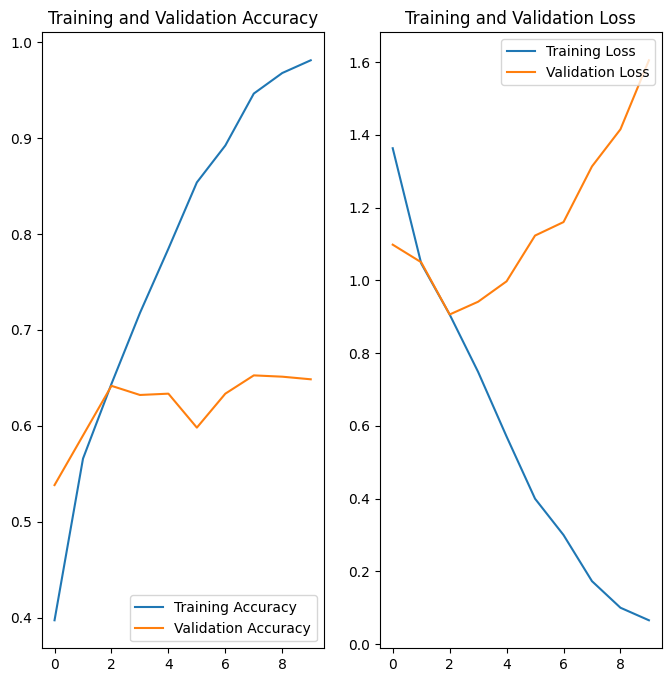

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

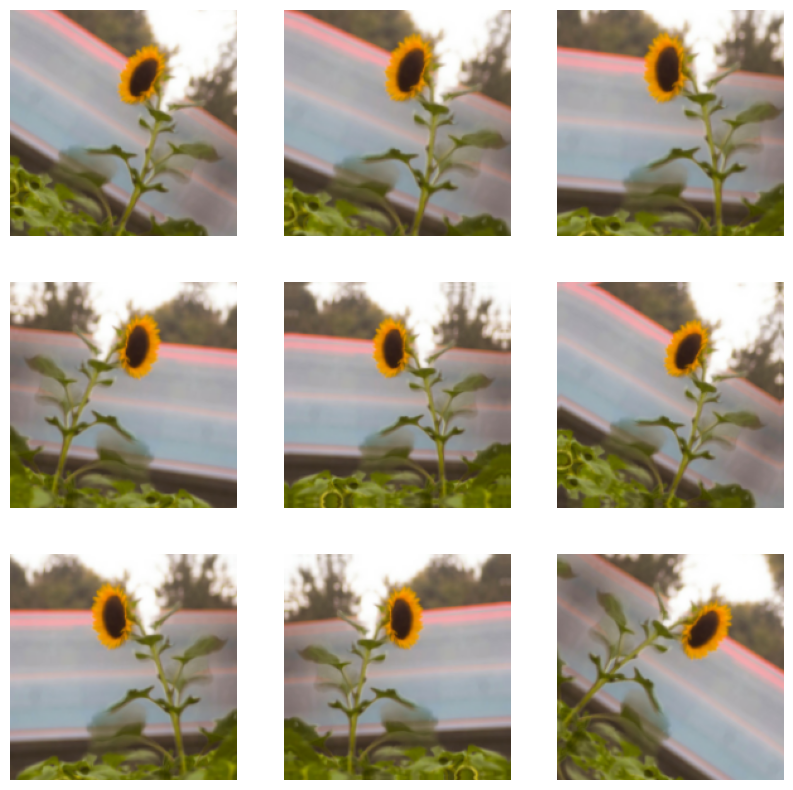

In [35]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [36]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 14s 143ms/step - loss: 1.2613 - accuracy: 0.4574 - val_loss: 1.1077 - val_accuracy: 0.5722
Epoch 2/15
92/92 [==============================] - 13s 143ms/step - loss: 0.9897 - accuracy: 0.6247 - val_loss: 0.9732 - val_accuracy: 0.6349
Epoch 3/15
92/92 [==============================] - 14s 147ms/step - loss: 0.9268 - accuracy: 0.6390 - val_loss: 1.1022 - val_accuracy: 0.5504
Epoch 4/15
92/92 [==============================] - 15s 165ms/step - loss: 0.8822 - accuracy: 0.6536 - val_loss: 0.8506 - val_accuracy: 0.6703
Epoch 5/15
92/92 [==============================] - 14s 152ms/step - loss: 0.7829 - accuracy: 0.6989 - val_loss: 0.8388 - val_accuracy: 0.6717
Epoch 6/15
92/92 [==============================] - 15s 160ms/step - loss: 0.7698 - accuracy: 0.7016 - val_loss: 0.8137 - val_accuracy: 0.6812
Epoch 7/15
92/92 [==============================] - 14s 149ms/step - loss: 0.7040 - accuracy: 0.7265 - val_loss: 0.8331 - val_accuracy: 0.6730

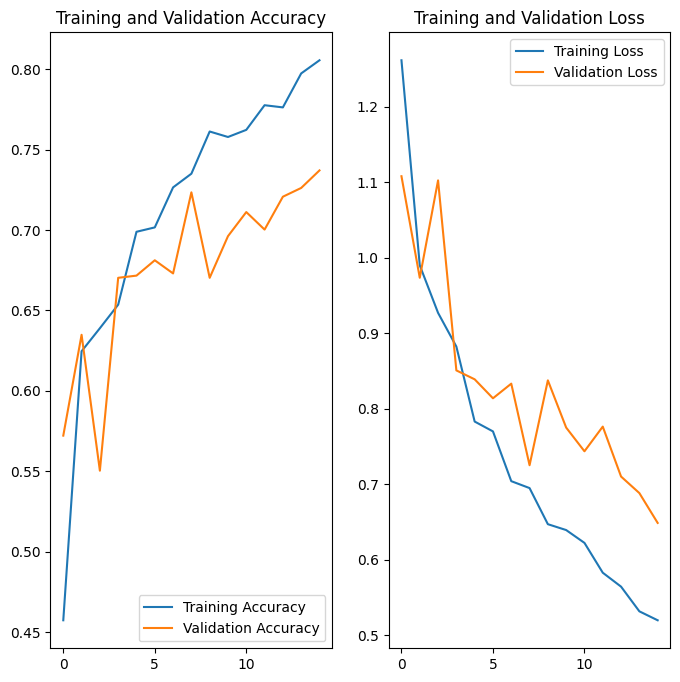

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
# Correct path to the sunflower image
sunflower_path = pathlib.Path('/Users/dong-ju/.keras/datasets/Red_sunflower/592px-Red_sunflower.jpg')

# Load and preprocess the image
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 90ms/step
This image most likely belongs to sunflowers with a 98.26 percent confidence.


In [50]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/ly/h9mjdl311vl8hjq1r10v8r200000gn/T/tmpjvza97qg/assets


INFO:tensorflow:Assets written to: /var/folders/ly/h9mjdl311vl8hjq1r10v8r200000gn/T/tmpjvza97qg/assets
2023-09-02 11:36:26.214639: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-09-02 11:36:26.215395: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-09-02 11:36:26.215705: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/ly/h9mjdl311vl8hjq1r10v8r200000gn/T/tmpjvza97qg
2023-09-02 11:36:26.217315: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-09-02 11:36:26.217321: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/ly/h9mjdl311vl8hjq1r10v8r200000gn/T/tmpjvza97qg
2023-09-02 11:36:26.221443: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-09-02 11:36:26.223256: I tensorflow/cc/saved_model/load

In [51]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [52]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [53]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [54]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [55]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to sunflowers with a 98.26 percent confidence.


In [56]:
print(np.max(np.abs(predictions - predictions_lite)))

1.4305115e-06
